In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
fashion_train_df = pd.read_csv('input//fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('input//fashion-mnist_test.csv')


In [7]:
fashion_train_df.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
training = np.array(fashion_train_df, dtype='float32')
testing = np.array(fashion_test_df, dtype='float32')

np.float32(9.0)

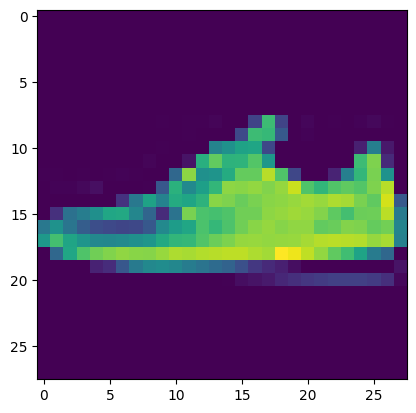

In [46]:
import random
i = random.randint(1, 6000)
plt.imshow(training[i][1:].reshape(28, 28))
label = training[1,0]
label

In [50]:
X_train = training[:, 1:]/255
y_train = training[:, 0]
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

In [53]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_val = X_val.reshape(X_val.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))


In [68]:
import keras

c:\Users\NtandoThumbu\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\NtandoThumbu\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\NtandoThumbu\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at te

In [75]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [76]:
from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [77]:
cm_model = Sequential()

In [78]:
cm_model.add(Conv2D(32,2,2, input_shape=(28, 28, 1) ,activation='relu'))
cm_model.add(MaxPooling2D(pool_size=(2, 2)))
cm_model.add(Flatten())
cm_model.add(Dense(32, activation='relu'))

cm_model.add(Dense(10, activation='sigmoid'))

In [79]:
cm_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [80]:
epochs = 10

In [81]:
cm_model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8063 - loss: 0.5463 - val_accuracy: 0.8486 - val_loss: 0.4058
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8616 - loss: 0.3839 - val_accuracy: 0.8567 - val_loss: 0.3855
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8732 - loss: 0.3525 - val_accuracy: 0.8737 - val_loss: 0.3443
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8794 - loss: 0.3329 - val_accuracy: 0.8852 - val_loss: 0.3201
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8843 - loss: 0.3191 - val_accuracy: 0.8809 - val_loss: 0.3253
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8880 - loss: 0.3065 - val_accuracy: 0.8867 - val_loss: 0.3184
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8931 - loss: 0.2946 - val_accuracy: 0.8885 - val_loss: 0.3131
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8955 - loss: 0.2852 - 

In [82]:
eval_loss, eval_accuracy = cm_model.evaluate(X_test, y_test)
print(f"Test Loss: {eval_loss}, Test Accuracy: {eval_accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.3004
Test Loss: 0.3004130721092224, Test Accuracy: 0.8916000127792358


In [83]:
predicted_classes = cm_model.predict(X_test)
predicted_labels = np.argmax(predicted_classes, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predicted_classes


array([[9.99430180e-01, 2.33706064e-03, 3.30962569e-01, ...,
        1.01683308e-05, 2.18340203e-01, 9.51696677e-08],
       [1.25759646e-01, 9.99992728e-01, 1.18207268e-01, ...,
        9.92479763e-05, 1.26596726e-02, 4.42853025e-06],
       [9.60720420e-01, 1.82245858e-03, 9.98984218e-01, ...,
        9.07236426e-07, 3.64481122e-04, 5.47041273e-05],
       ...,
       [1.68250024e-03, 1.18816635e-04, 2.80486867e-02, ...,
        1.08450680e-04, 9.99922156e-01, 5.49561828e-02],
       [9.73858356e-01, 4.14582435e-03, 1.70394406e-01, ...,
        9.67539381e-04, 9.98572588e-01, 2.04022992e-02],
       [2.06391156e-01, 8.45171154e-01, 5.59875429e-01, ...,
        3.15153768e-04, 2.91619778e-01, 3.39221238e-04]],
      shape=(10000, 10), dtype=float32)

In [85]:
I = 5
w = 5

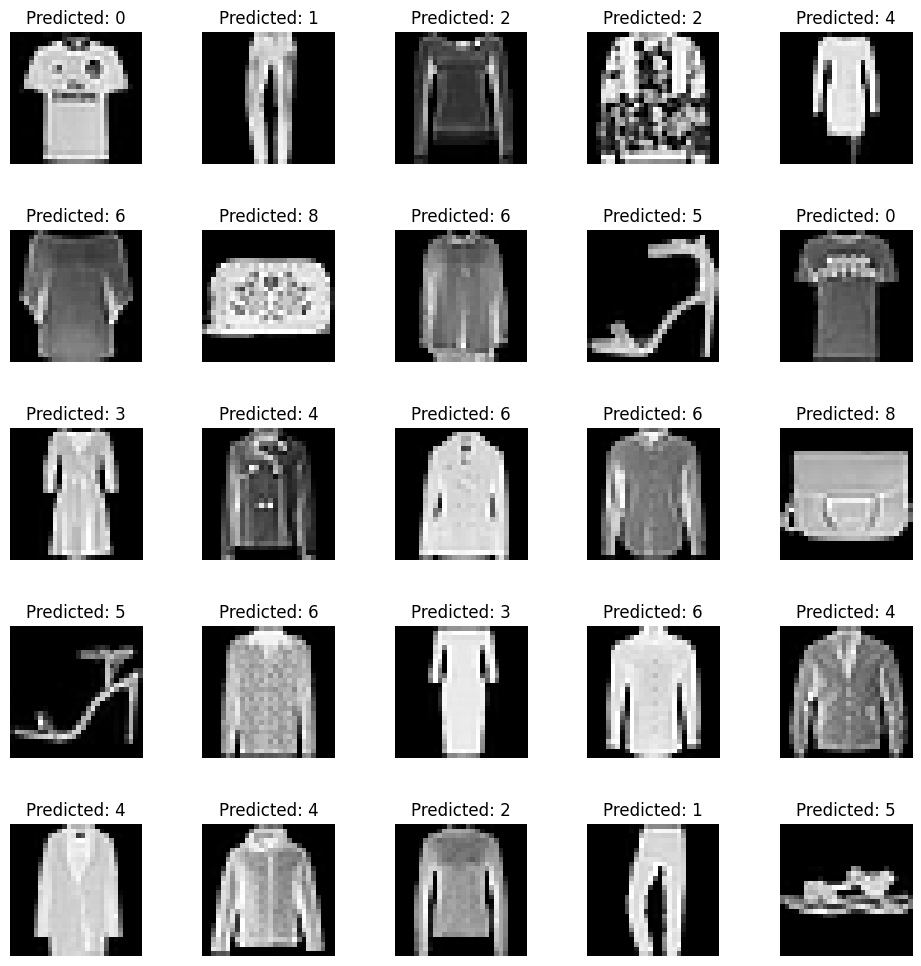

In [89]:
fig, axes = plt.subplots(I, w, figsize=(12, 12))
axes = axes.ravel()
for i in range(0, I * w):
    axes[i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Predicted: {predicted_labels[i]}")
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.5)